In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud


In [3]:
df = pd.read_csv("Dataset/spam.csv",encoding='ISO-8859-1')
# 'ISO-8859-1' used to only read unicode characters and avoid reading emogies, like things in text

In [4]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns = ['labels','data']

#changing the heading of the coulmns

In [6]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

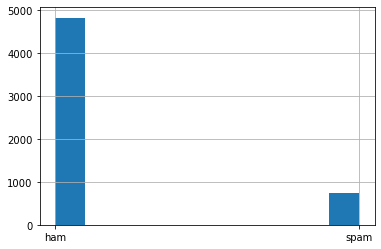

In [7]:
df.labels.hist()

In [8]:
y = df['labels'].map({'ham':0,'spam':1})

In [9]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: labels, dtype: int64

In [10]:
x = df['data']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,\
                                                 random_state=10)

In [12]:
print(x_train.head(),end="\n \n ")
print(y_train.head())

5281               And how you will do that, princess? :)
1300    Great to hear you are settling well. So what's...
5128    Wot about on wed nite I am 3 then but only til 9!
1808      Do have a nice day today. I love you so dearly.
856     Talk sexy!! Make new friends or fall in love i...
Name: data, dtype: object
 
 5281    0
1300    0
5128    0
1808    0
856     1
Name: labels, dtype: int64


## Using Count vectorizer to make each text to vector

In [13]:
vectorizer = CountVectorizer(decode_error='ignore') 
# decode_error='ignore' is to ignore text like emogies

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [14]:
x_train

<4457x7756 sparse matrix of type '<class 'numpy.int64'>'
	with 59447 stored elements in Compressed Sparse Row format>

In [15]:
x_test

<1115x7756 sparse matrix of type '<class 'numpy.int64'>'
	with 13687 stored elements in Compressed Sparse Row format>

In [16]:
# Creating training model

In [17]:
model = MultinomialNB()
model.fit(x_train,y_train)

print("Train Accuracy :", model.score(x_train,y_train))
print("Test Accuracy :", model.score(x_test,y_test))

#for an imbalanced set like this (we know from hist()) accuracy is not the good measure, instead use f1 score

Train Accuracy : 0.9939421135292797
Test Accuracy : 0.9838565022421525


In [18]:
#finding F1 score

In [19]:
predicted_for_train = model.predict(x_train)
predicted_for_test = model.predict(x_test)

print("Train F1 score is : ", f1_score(y_train,predicted_for_train))
print("Test F1 score is : ", f1_score(y_test,predicted_for_test))

Train F1 score is :  0.9775561097256857
Test F1 score is :  0.935251798561151


In [20]:
# using prediction probability

In [21]:
#[prob for ham, prob for spam]
#prob for ham ->

prob_train = model.predict_proba(x_train)[:,1] #slicing to only take spam related values

prob_test = model.predict_proba(x_test)[:,1]

In [22]:
prob_test

array([1.09343242e-01, 7.93834092e-02, 1.24918763e-04, ...,
       2.86607592e-14, 1.06029426e-02, 1.19485235e-06])

In [23]:
prob_train

array([1.94632465e-06, 5.90332669e-06, 2.64156054e-07, ...,
       4.73074231e-24, 9.96417787e-04, 5.68504283e-04])

In [25]:
print("Train_ROC_AUC:",roc_auc_score(y_train,prob_train))

#<.5 is not good

Train_ROC_AUC: 0.9939867962179638


In [26]:
print("Test_ROC_AUC:",roc_auc_score(y_test,prob_test))

#<.5 is not good

Test_ROC_AUC: 0.9697545253100809


In [32]:
p_train = model.predict(x_train)

In [33]:
#Confusion Matrix

cm_train = confusion_matrix(y_train,p_train)
cm_train

array([[3842,   11],
       [  16,  588]], dtype=int64)

Text(33.0, 0.5, 'Actual')

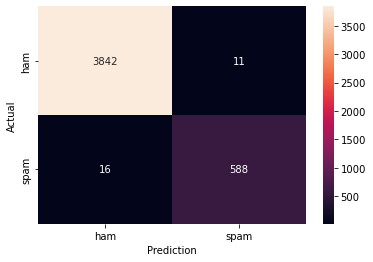

In [37]:
ax = sns.heatmap(cm_train,annot=True,xticklabels=['ham','spam'],yticklabels=['ham','spam'],fmt='g')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

In [38]:
#make confusion_matrix of y_test,predicted_test

In [39]:
#Visualize word cloud

In [ ]:
# check where our model is going wrong